In [2]:
import numpy as np
import pandas as pd
import os
import copy
import matplotlib.pylab as plt
#import seaborn as sbn
import pickle
import sys

from scipy.stats import ks_2samp
from sklearn.preprocessing import MinMaxScaler, StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from itertools import permutations, combinations
#from statsmodels.discrete.discrete_model import Logit

## Loading datafiles for classification model training and testing

In [3]:

#data_training = pd.concat(pd.read_excel('data/leak_train_11.xlsx', sheet_name=None), ignore_index=True)
#data_test = pd.concat(pd.read_excel('data/leak_test_11.xlsx', sheet_name=None), ignore_index=True)
# Loading files
data_training = pd.read_csv('data_train_classification_1.csv')
data_test = pd.read_csv('data_test_classification_1.csv')

In [4]:
data_training.head()

,Unnamed: 0,obs12,prd12,stat12,pval12,obs13,prd13,stat13,pval13,obs14,...,obs79,prd79,stat79,pval79,obs89,prd89,stat89,pval89,leak,leak_num
0,0,0.000481,0.028312,0.035699,0.874723,0.013993,0.011031,0.045054,0.636313,-0.058470,...,-0.020465,-0.008644,0.028602,0.977169,-0.013116,-0.001280,0.043978,0.665890,0,0
1,1,-0.101974,0.005374,0.052796,0.434209,-0.052071,0.003125,0.092473,0.019877,-0.101030,...,0.053336,-0.006653,0.042581,0.704180,0.003322,-0.003525,0.025484,0.993568,0,0
2,2,-0.107069,-0.014312,0.050645,0.487184,0.000114,-0.006548,0.051290,0.470964,-0.067394,...,-0.001909,0.007349,0.033656,0.913867,0.000894,0.004495,0.067419,0.170488,0,0
3,3,0.036892,0.003886,0.041398,0.736140,-0.010108,0.004022,0.044946,0.639269,0.125637,...,0.038543,-0.000716,0.048495,0.543013,-0.009649,-0.003774,0.041075,0.744746,0,0
4,4,0.092321,-0.018695,0.071505,0.125745,0.003722,0.000877,0.025914,0.992118,0.010417,...,0.001004,0.001417,0.051183,0.473649,-0.001064,-0.004290,0.028172,0.980332,0,0


In [5]:
data_training.describe()

,Unnamed: 0,obs12,prd12,stat12,pval12,obs13,prd13,stat13,pval13,obs14,...,obs79,prd79,stat79,pval79,obs89,prd89,stat89,pval89,leak,leak_num
count,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,...,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.0000
mean,149.500000,-0.000074,-0.937086,0.398543,1.318993e-01,-0.000209,0.046585,0.228704,1.334340e-01,-0.001695,...,0.000307,-1.159361,0.484224,1.323031e-01,0.000066,-0.003022,0.225656,1.286509e-01,0.750000,1.5000
std,86.638166,0.067514,0.570851,0.217663,2.706775e-01,0.019560,0.128031,0.134085,2.710540e-01,0.053825,...,0.039181,1.686162,0.338234,2.698915e-01,0.010097,0.048833,0.126859,2.641230e-01,0.433193,1.1185
min,0.000000,-0.222489,-1.560880,0.022581,1.342166e-142,-0.058777,-0.140137,0.025914,2.762087e-68,-0.199807,...,-0.116153,-3.991102,0.022581,2.470328e-323,-0.037008,-0.076940,0.020860,2.212694e-47,0.000000,0.0000
25%,74.750000,-0.043387,-1.283256,0.313334,2.757229e-71,-0.013144,-0.043586,0.145890,5.990279e-26,-0.035698,...,-0.025767,-1.729040,0.260534,7.638062e-90,-0.006310,-0.024684,0.128444,2.138344e-30,0.750000,0.7500
50%,149.500000,0.001632,-1.110726,0.447022,2.259657e-52,0.000384,0.051487,0.218008,2.077390e-12,-0.003257,...,-0.001548,-0.483652,0.454264,8.166527e-53,-0.000178,-0.003124,0.227105,5.015562e-09,1.000000,1.5000
75%,224.250000,0.046915,-0.776597,0.531855,8.612456e-04,0.013272,0.135370,0.321611,8.406479e-04,0.037124,...,0.028164,0.096202,0.678060,6.728719e-05,0.006088,0.022282,0.343315,1.280997e-03,1.000000,2.2500
max,299.000000,0.244525,0.071252,0.708291,9.988245e-01,0.056225,0.230267,0.508224,9.921176e-01,0.152286,...,0.141025,0.308486,0.995935,9.988245e-01,0.047627,0.067982,0.426569,9.997000e-01,1.000000,3.0000


In [6]:
# Selecting the featutes like means, ks_stat or ks_pval

def feature_selection(data_df,features,output_col):
    
    columns = []
    for feature in features:
        col_temp = [col for col in data_df.columns if feature in col]
        columns.extend(col_temp)
    columns.extend(output_col)
    data_df_select = data_df[columns]
    return data_df_select

## Logistic Regression Model

In [14]:
def logistic_reg(output_type,
                 train_df_full,
                 test_df_full,
                 features): # 'obs','prd','stat','pval'
    
    if output_type == 'binary':
        output_col = ['leak']
    else:
        output_col = ['leak_num']
        
    train_df = feature_selection(train_df_full,features,output_col)
    test_df = feature_selection(test_df_full,features,output_col)

    xdata=np.array(train_df)[:,:-2]
    if output_type=='binary':
        ydata=np.array(train_df)[:,-2]
    else:
        ydata=np.array(train_df)[:,-1]
    
    xdata_test=np.array(test_df)[:,:-2]
    if output_type=='binary':
        ydata_test=np.array(test_df)[:,-2]
    else:
        ydata_test=np.array(test_df)[:,-1]
    
    scaler = StandardScaler()
    xtrain_norm = scaler.fit_transform(xdata)
    xtest_norm = scaler.transform(xdata_test)
    
    if output_type=='binary':
        model=LogisticRegression()
    else:
        model=LogisticRegression(multi_class='multinomial',class_weight='balanced',max_iter=5000)
        
    model.fit(xtrain_norm,ydata)
    beta = model.coef_
    ypred = model.predict(xtest_norm)
    report = classification_report(ydata_test,ypred,output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    
    conf_mat = confusion_matrix(ydata_test,ypred)
    
    return conf_mat, beta,report_df

In [15]:
def randomforest(output_type,
                 train_df_full,
                 test_df_full,
                 features): # 'obs','prd','stat','pval'
    
    if output_type == 'binary':
        output_col = ['leak']
    else:
        output_col = ['leak_num']
        
    train_df = feature_selection(train_df_full,features,output_col)
    test_df = feature_selection(test_df_full,features,output_col)

    xdata=np.array(train_df)[:,:-2]
    if output_type=='binary':
        ydata=np.array(train_df)[:,-2]
    else:
        ydata=np.array(train_df)[:,-1]
    
    xdata_test=np.array(test_df)[:,:-2]
    if output_type=='binary':
        ydata_test=np.array(test_df)[:,-2]
    else:
        ydata_test=np.array(test_df)[:,-1]
    
    scaler = StandardScaler()
    xtrain_norm = scaler.fit_transform(xdata)
    xtest_norm = scaler.transform(xdata_test)

    
    model=RandomForestClassifier(random_state = 42)
    
#     if output_type=='binary':
#         model=LogisticRegression()
#     else:
#         model=LogisticRegression(multi_class='multinomial',class_weight='balanced',max_iter=5000)
        
    model.fit(xtrain_norm,ydata)
    #beta = model.coef_
    ypred = model.predict(xtest_norm)
    report = classification_report(ydata_test,ypred,output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    
    conf_mat = confusion_matrix(ydata_test,ypred)
    
    return conf_mat, report_df

## Results for Prediction Error based approach

* Test Set with normal/expected demand based 'no leak data' plus leak data

In [16]:
lrcmat_mean,lrbeta_mean,lrreport_mean = logistic_reg('multi',
                                                                    data_training,
                                                                    data_test,
                                                                   ['obs','prd'])

(1200, 71)


/export/scratch1/ntm/nikolaj_workstation_data/PhD/ML-for-WDN/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/export/scratch1/ntm/nikolaj_workstation_data/PhD/ML-for-WDN/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/export/scratch1/ntm/nikolaj_workstation_data/PhD/ML-for-WDN/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

In [68]:
np.set_printoptions(threshold=sys.maxsize)

In [69]:
[str(0)]+[str(i) for i in range(6,98)]

['0',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97']

In [70]:
#lrcmat_pd = pd.DataFrame(data=lrcmat_mean,columns=[str(0)]+[str(i) for i in range(1,35)],index=[str(0)]+[str(i) for i in range(1,35)])
lrcmat_pd = pd.DataFrame(data=lrcmat_mean,columns=[str(0)]+[str(i) for i in range(1,4)],index=[str(0)]+[str(i) for i in range(1,4)])
#lrcmat_pd = pd.DataFrame(data=lrcmat_mean,columns=[str(0)]+[str(i) for i in range(1,10)]+[str(i) for i in range(11,119)],index=[str(0)]+[str(i) for i in range(1,10)]+[str(i) for i in range(11,119)])

In [71]:
lrcmat_mean

array([[2, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 1, 1],
       [1, 0, 0, 1]])

In [72]:
lrcmat_pd.to_csv('log_reg_conf_mat.csv')

In [73]:
lrreport_mean.to_csv('log_reg_acc_report.csv')

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (2).

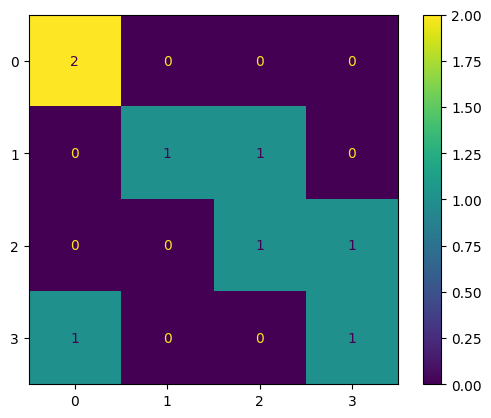

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=lrcmat_mean,
    display_labels=['leak', 'leak_num'],)
disp.plot()
plt.show()

In [ ]:
cmat_mean, report_mean = randomforest('multi',
                                                                    data_training,
                                                                    data_test,
                                                                   ['obs','prd'])

In [75]:
report_mean

NameError: name 'report_mean' is not defined

In [76]:
report_mean.to_csv('pp.csv')

NameError: name 'report_mean' is not defined

In [77]:
cmat_pd = pd.DataFrame(data=cmat_mean,columns=[str(0)]+[str(i) for i in range(1,4)],index=[str(0)]+[str(i) for i in range(1,4)])

NameError: name 'cmat_mean' is not defined

In [78]:
cmat_pd.to_csv('pp1.csv')

NameError: name 'cmat_pd' is not defined

In [79]:
cmat_mean

NameError: name 'cmat_mean' is not defined

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cmat_mean,
    display_labels=['leak', 'leak_num'],)
disp.plot()
plt.show()

NameError: name 'cmat_mean' is not defined